In [2]:
import numpy as np
import pandas as pd

In [3]:
# Substituir o separador decimal ',' por '.' 
f = lambda x : (x.replace(',', '.'))
# Carregando os microdados do enade 2017
enade = pd.read_csv(
    'dados/microdados_ENADE_2017.csv.zip', # caminho do arquivo
    compression='zip',                     # tipo de compressão do arquivo
    sep=';',                               # separador de colunas  
    na_values=['.', '*'],                  # substituir as strings '.' e '*' por NA (ver dicionário de dados)
    converters={'NT_GER':f,                # substituir o separador decimal por '.'
                'NT_FG':f, 
                'NT_OBJ_FG':f, 
                'NT_DIS_FG':f, 
                'NT_CE':f, 
                'NT_OBJ_CE':f, 
                'NT_DIS_CE':f
               },
    encoding= 'UTF-8',                     # definir a codificação
    dtype={'DS_VT_ESC_OFG': 'str',         # converter colunas com valores mistos (str, num) para str
           'DS_VT_ESC_OCE': 'str',         
           'DS_VT_ACE_OCE': 'str'           
          }
)
# Convertendo as coluna das notas de object para numeric
cols_convert = ['NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG', 'NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE']
enade[cols_convert] = enade[cols_convert].apply(pd.to_numeric, errors='coerce', axis=1)

In [4]:
# Exibindo o dataframe
enade.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81
0,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,1,1,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
enade.shape

(537436, 150)

In [6]:
conceitos_enade = pd.read_csv('dados/resultados_conceito_enade_2017.csv')
 
conceitos_enade.head()

,Ano,Código da Área,Área de Avaliação,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,Modalidade de Ensino,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,2017,21,ARQUITETURA E URBANISMO,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Universidade,Pública Federal,44,Educação Presencial,...,MT,44,43,"59,4977","3,1401","62,9744","4,4030","4,0873",5,NaN
1,2017,21,ARQUITETURA E URBANISMO,2,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,132,Educação Presencial,...,DF,141,128,"61,3602","3,4161","60,7516","4,1266","3,9490",5,NaN
2,2017,21,ARQUITETURA E URBANISMO,2,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pública Federal,1138293,Educação Presencial,...,DF,123,110,"58,3155","2,9649","55,6845","3,4965","3,3636",4,NaN
3,2017,21,ARQUITETURA E URBANISMO,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Universidade,Pública Federal,99444,Educação Presencial,...,SE,42,31,"62,2290","3,5448","57,5161","3,7243","3,6794",4,NaN
4,2017,21,ARQUITETURA E URBANISMO,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pública Federal,122640,Educação Presencial,...,AM,64,50,"60,3600","3,2679","54,7100","3,3753","3,3485",4,NaN


In [7]:
# Separando apenas as respostas dos alunos das IES do nordeste
uf_nordeste = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
enade_nordeste = pd.DataFrame()
 
for uf in uf_nordeste:
    temp = conceitos_enade[conceitos_enade['Sigla da UF'] == uf]
    enade_nordeste = pd.concat([enade_nordeste, temp])
   
enade_nordeste =  enade_nordeste.reset_index()
 
enade_nordeste.head()

,index,Ano,Código da Área,Área de Avaliação,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,150,2017,21,ARQUITETURA E URBANISMO,568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,Universidade,Pública Estadual,11891,...,MA,107,106,"59,4226","3,1290","56,1264","3,5515","3,4458",4,NaN
1,194,2017,21,ARQUITETURA E URBANISMO,823,UNIVERSIDADE DO CEUMA - UNICEUMA,UNICEUMA,Universidade,Privada sem fins lucrativos,55336,...,MA,121,99,"47,9061","1,4225","38,2333","1,3264","1,3505",2,NaN
2,257,2017,21,ARQUITETURA E URBANISMO,1885,UNIDADE DE ENSINO SUPERIOR DOM BOSCO,UNDB,Faculdade,Privada com fins lucrativos,1154789,...,MA,36,36,"62,9139","3,6463","49,4222","2,7178","2,9499",4,NaN
3,574,2017,72,TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SIS...,2189,FACULDADE DO MARANHÃO,FACAM-MA,Faculdade,Privada com fins lucrativos,1258369,...,MA,15,11,"50,0273","3,1397","30,3909","1,4096","1,8421",2,NaN
4,645,2017,72,TECNOLOGIA EM ANÁLISE E DESENVOLVIMENTO DE SIS...,4964,FACULDADE DE CIÊNCIAS E TECNOLOGIA DO MARANHÃO,FACEMA,Faculdade,Privada com fins lucrativos,1106470,...,MA,35,27,"47,6259","2,8345","34,8148","1,9460","2,1681",3,NaN


In [8]:
enade_nordeste.shape

(1997, 23)

In [9]:
enade_nordeste_publicas = enade_nordeste[enade_nordeste['Categoria Administrativa'].str.contains(
    'Pública', case=False, regex=True)]
 
enade_nordeste_publicas.head()

,index,Ano,Código da Área,Área de Avaliação,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,Código do Curso,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,150,2017,21,ARQUITETURA E URBANISMO,568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,Universidade,Pública Estadual,11891,...,MA,107,106,"59,4226","3,1290","56,1264","3,5515","3,4458",4,NaN
7,963,2017,701,MATEMÁTICA (BACHARELADO),548,UNIVERSIDADE FEDERAL DO MARANHÃO,UFMA,Universidade,Pública Federal,311439,...,MA,2,2,"43,5500","1,5049","44,1500","1,8033","1,7287",2,NaN
8,1140,2017,702,MATEMÁTICA (LICENCIATURA),548,UNIVERSIDADE FEDERAL DO MARANHÃO,UFMA,Universidade,Pública Federal,11439,...,MA,12,12,"50,8500","2,6409","35,1750","1,8997","2,0850",3,NaN
9,1144,2017,702,MATEMÁTICA (LICENCIATURA),568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,Universidade,Pública Estadual,81423,...,MA,33,27,"38,6259","1,2145","27,9481","1,0780","1,1121",2,NaN
10,1145,2017,702,MATEMÁTICA (LICENCIATURA),568,UNIVERSIDADE ESTADUAL DO MARANHÃO,UEMA,Universidade,Pública Estadual,81812,...,MA,27,26,"52,1885","2,7971","27,3731","1,0126","1,4588",2,NaN


In [10]:
enade_nordeste_publicas.shape

(1285, 23)

In [11]:
maior_conceito = enade_nordeste_publicas[enade_nordeste_publicas['Conceito Enade (Faixa)'] == '5']

In [12]:
maior_conceito.shape

(70, 23)

In [13]:
menor_conceito = enade_nordeste_publicas[enade_nordeste_publicas['Conceito Enade (Faixa)'] == '1']

In [14]:
menor_conceito.shape

(71, 23)

In [16]:
maior_conceito.rename(columns={'Código do Curso':'CO_CURSO'}, inplace=True)
 
enade_maior = pd.merge(enade, maior_conceito, on='CO_CURSO')                  
 
enade_maior.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN
1,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN
2,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN
3,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN
4,2017,3,1,10028,6008,299,1,2806701,28,2,...,SE,6,6,"67,6000","3,6737","47,3500","4,1781","4,0520",5,NaN


In [17]:
enade_maior.shape

(3156, 172)

In [18]:
menor_conceito.rename(columns={'Código do Curso':'CO_CURSO'}, inplace=True)
 
enade_menor = pd.merge(enade, menor_conceito, on='CO_CURSO')                  
 
enade_menor.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,Sigla da UF,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Observação
0,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN
1,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN
2,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN
3,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN
4,2017,71,2,10028,5402,3567,1,2408003,24,2,...,RN,10,10,"33,1800","0,0000","32,8600","0,3589","0,2691",1,NaN


In [19]:
enade_menor.shape

(2767, 172)

In [23]:
# Bibliotecas necessárias para plotar as vizualizações
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# Plotar os gráficos direto no jupyter notebook
%matplotlib inline
# Definir o estilo dos gráficos semelhantes ao ggplot
plt.style.use('seaborn-whitegrid')
#plt.style.use('ggplot')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

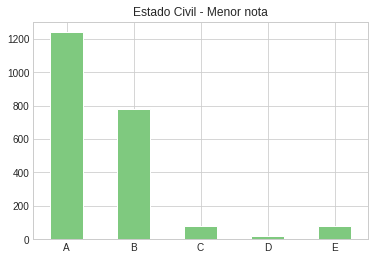

In [176]:
enade_menor['QE_I01'].value_counts().sort_index(ascending=True).plot(kind='bar', title='Estado Civil - Menor nota',
                                          colormap='Accent')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

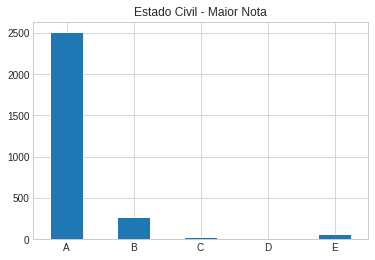

In [75]:
enade_maior['QE_I01'].value_counts().sort_index(ascending=True).plot(kind='bar', title='Estado Civil - Maior Nota')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

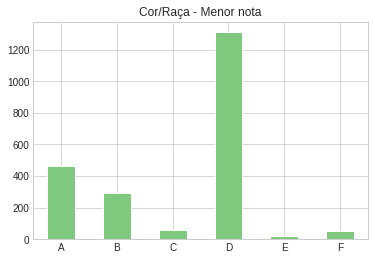

In [175]:
enade_menor['QE_I02'].value_counts().sort_index(ascending=True).plot(kind='bar', title='Cor/Raça - Menor nota', colormap='Accent')

#plt.legend(title="Estado Cívil",loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

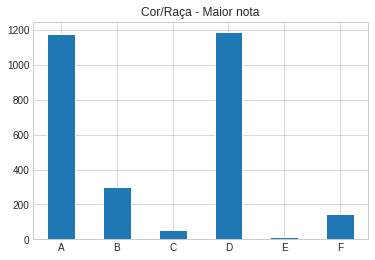

In [73]:
enade_maior['QE_I02'].value_counts().sort_index(ascending=True).plot(kind='bar', title='Cor/Raça - Maior nota')
plt.xticks(rotation=0)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

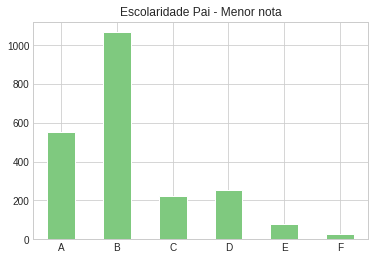

In [174]:
enade_menor['QE_I04'].value_counts().sort_index(ascending=True).plot(kind='bar', title='Escolaridade Pai - Menor nota', colormap='Accent')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

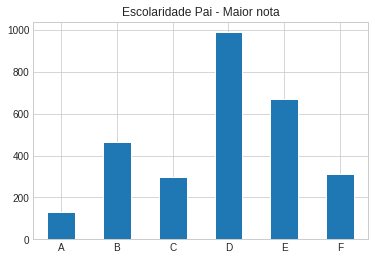

In [93]:
enade_maior['QE_I04'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Escolaridade Pai - Maior nota')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

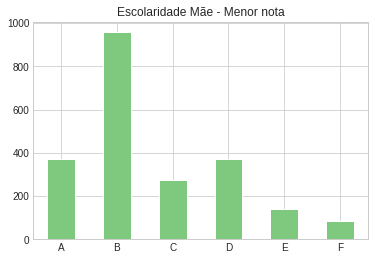

In [173]:
enade_menor['QE_I05'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Escolaridade Mãe - Menor nota',
    colormap='Accent')

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

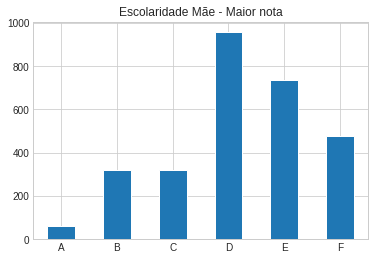

In [97]:
enade_maior['QE_I05'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Escolaridade Mãe - Maior nota')

plt.xticks(rotation=0)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

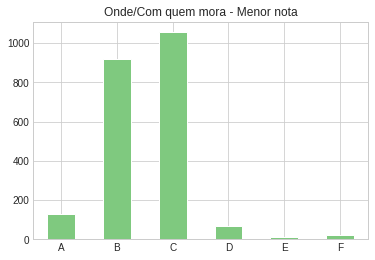

In [172]:
enade_menor['QE_I06'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Onde/Com quem mora - Menor nota',
    colormap='Accent')

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

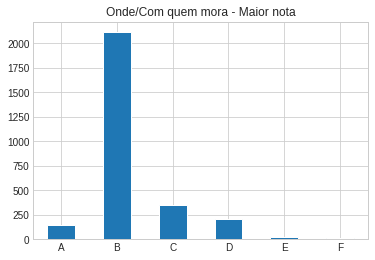

In [99]:
enade_maior['QE_I06'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Onde/Com quem mora - Maior nota')

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

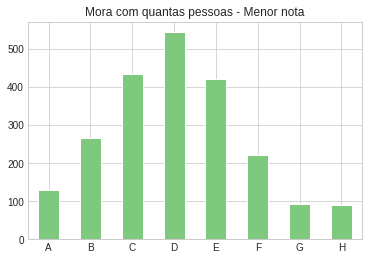

In [171]:
enade_menor['QE_I07'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Mora com quantas pessoas - Menor nota',
    colormap='Accent')

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

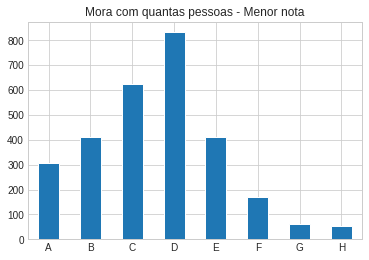

In [101]:
enade_maior['QE_I07'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Mora com quantas pessoas - Menor nota')

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

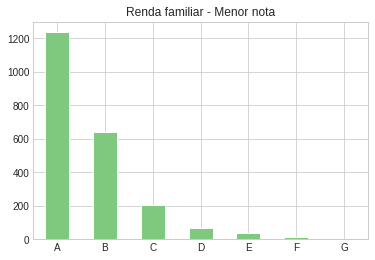

In [170]:
enade_menor['QE_I08'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Renda familiar - Menor nota',
    colormap='Accent')

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

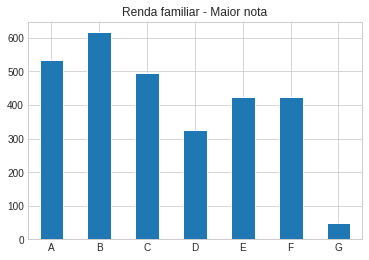

In [103]:
enade_maior['QE_I08'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Renda familiar - Maior nota')

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

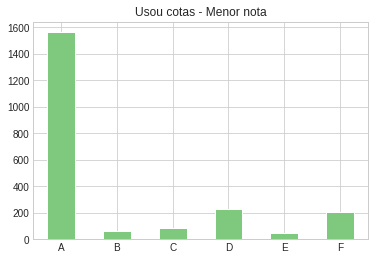

In [169]:
enade_menor['QE_I15'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Usou cotas - Menor nota',
    colormap='Accent')

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

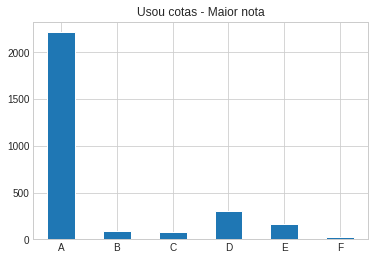

In [105]:
enade_maior['QE_I15'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Usou cotas - Maior nota')

plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

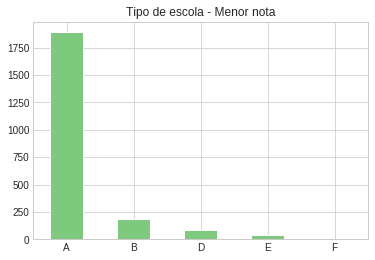

In [168]:
enade_menor['QE_I17'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Tipo de escola - Menor nota',
    colormap='Accent')

plt.xticks(rotation=0)
#, , Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

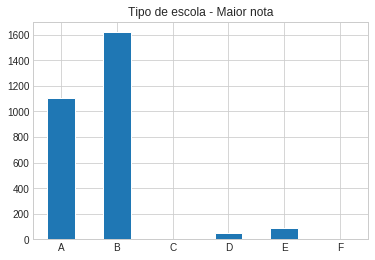

In [107]:
enade_maior['QE_I17'].value_counts().sort_index(ascending=True).plot(
    kind='bar', 
    title='Tipo de escola - Maior nota')

plt.xticks(rotation=0)

In [ ]:
# Gerando a figura
ax = sns.barplot(x='QE_I01', data=enade_menor, estimador=sum)
 
# Definindo o título da figura
ax.set_title('Estado Civil - Menor nota', fontsize=20)
 
# Definindo o nome do eixo horizontal
ax.set_xlabel('Estado Civil', fontsize=15)
 
# Definindo o nome do eixo vertical
ax.set_ylabel('Quantidade', fontsize=15)
 
# Definindo a legenda manualmente
l1 = mpatches.Patch(color='C0',label='Solteiro')
l2 = mpatches.Patch(color='C1',label='Casado')
l3 = mpatches.Patch(color='C2',label='Outro')
l4 = mpatches.Patch(color='C3',label='Separado/divorciado')
plt.legend(handles=[l1,l2,l3,l4], title='Estado civil', bbox_to_anchor=(1, 1))
 
# Exibindo a figura sem mensagem de retorno
plt.show()
 

In [ ]:
# somar as respostas para cada questão dos alunos daquele curso e instituição (usar codigo curso)
# plotar grafico
 
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(10,6))
 
# Gerando a figura
ax = sns.barplot('QE_I01', 'totalAlunos', data=enade_maior.sort_values(by='totalAlunos', ascending=False))
 
# Título da Figura
ax.set_title('Total de alunos das Universidades Federais \ndo Nordeste em 2016', fontsize=20)
 
# Definindo o nome do eixo horizontal
ax.set_xlabel('Instituição', fontsize=15)
 
# Definindo o nome do eixo vertical
ax.set_ylabel('Total de alunos', fontsize=15)
 
# Exibindo a figura sem mensagem de retorno
plt.show()
 
 


In [ ]:
 
# Estado Civil x Nota geral
 
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))
 
# Ordenando as colunas
order_q01 = pd.DataFrame(enade_maior.groupby('QE_I01')['NT_GER'].mean()).reset_index(
        ).sort_values(by='NT_GER', ascending=False)['QE_I01'].values
 
# Gerando a figura
ax = sns.barplot(x='QE_I01',y='NT_GER', data=df, order=order_q01, ci=True)
 
# Definindo o título da figura
ax.set_title('Estado Civil vs Nota no Enade', fontsize=20)
 
# Definindo o nome do eixo horizontal
ax.set_xlabel('Estado Civil', fontsize=15)
 
# Definindo o nome do eixo vertical
ax.set_ylabel('Nota no Enade', fontsize=15)
 
# Definindo a legenda manualmente
l1 = mpatches.Patch(color='C0',label='Solteiro')
l2 = mpatches.Patch(color='C1',label='Casado')
l3 = mpatches.Patch(color='C2',label='Outro')
l4 = mpatches.Patch(color='C3',label='Separado/divorciado')
plt.legend(handles=[l1,l2,l3,l4], title='Estado civil', bbox_to_anchor=(1, 1))
 
# Exibindo a figura sem mensagem de retorno
plt.show()
 
 
 
# Variável alvo NT_GER (Nota geral)
 
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))
 
# Gerando a figura
ax = sns.distplot(df['NT_GER'], kde=True)
 
# Definindo o título da figura
ax.set_title('Distribuição da Nota Geral - Enade 2017', fontsize=18)
 
# Definindo o nome do eixo horizontal
ax.set_xlabel('Nota Geral (0-100)', fontsize=15)
 
# Exibindo a figura sem mensagem de retorno
plt.show()